In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Sample data
data = pd.DataFrame({
    'category': ['A', 'B', 'A', 'C', 'B', 'C', 'A', 'D'],
    'target': [1, 0, 1, 0, 1, 1, 0, 1]
})

# Split data
train, test = train_test_split(data, test_size=0.2, random_state=42)

# Calculate mean target for each category
target_means = train.groupby('category')['target'].mean()

# Function to encode with smoothing
def smooth_target_encode(x, target_means, smoothing=10):
    global_mean = train['target'].mean()
    count = train['category'].value_counts()[x]
    return (count * target_means[x] + smoothing * global_mean) / (count + smoothing)

# Apply encoding
train['encoded'] = train['category'].map(lambda x: smooth_target_encode(x, target_means))
test['encoded'] = test['category'].map(lambda x: smooth_target_encode(x, target_means) if x in target_means.index else train['target'].mean())

print(train)
print(test)

  category  target   encoded
0        A       1  0.666667
7        D       1  0.696970
2        A       1  0.666667
4        B       1  0.696970
3        C       0  0.606061
6        A       0  0.666667
  category  target   encoded
1        B       0  0.696970
5        C       1  0.606061


In [3]:
pd.DataFrame(data)

,duration,event,age,sex
0,5,1,50,0
1,6,1,60,1
2,6,0,40,0
3,6,1,70,1
4,7,0,30,0
5,10,1,80,1
6,11,0,20,0
7,11,1,90,1
8,12,0,25,0
9,12,1,85,1


<lifelines.StatisticalResult: proportional_hazard_test>
    time_transform = rank
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 10 total observations, 4 right-censored observations>
         test_name = proportional_hazard_test

---
     test_statistic    p  -log2(p)
age            0.64 0.42      1.23
sex            1.79 0.18      2.47
Proportional hazard assumption looks okay.


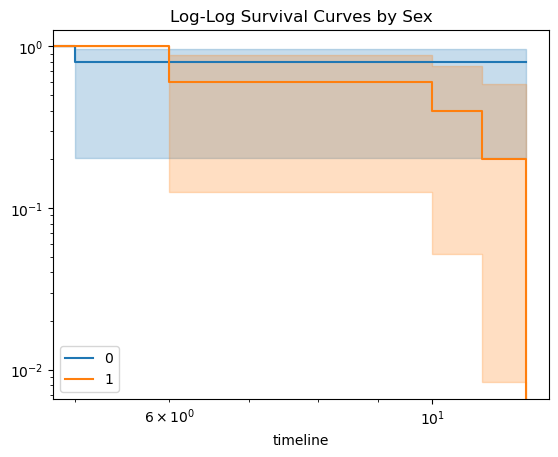

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lifelines import CoxPHFitter, KaplanMeierFitter
from lifelines.statistics import proportional_hazard_test

# Sample data for demonstration purposes
data = {
    'duration': [5, 6, 6, 6, 7, 10, 11, 11, 12, 12],
    'event': [1, 1, 0, 1, 0, 1, 0, 1, 0, 1],
    'age': [50, 60, 40, 70, 30, 80, 20, 90, 25, 85],
    'sex': [0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
}

df = pd.DataFrame(data)

# Fit the Cox Proportional Hazards model
cph = CoxPHFitter()
cph.fit(df, duration_col='duration', event_col='event')

# Check the proportional hazards assumption using Schoenfeld residuals
results = proportional_hazard_test(cph, df)
print(results)

# Plot Schoenfeld residuals
cph.check_assumptions(df)

# Plot log-log survival curves for different groups (e.g., sex)
kmf = KaplanMeierFitter()
fig, ax = plt.subplots()

for name, grouped_df in df.groupby('sex'):
    kmf.fit(grouped_df['duration'], grouped_df['event'], label=name)
    kmf.plot_survival_function(ax=ax)

plt.title('Log-Log Survival Curves by Sex')
plt.yscale('log')
plt.xscale('log')
plt.show()